# Name : Jeet Limbachiya

# Task 1 : Predict the percentage of a student based on the no. of study hours.

Sub. : A dedicated example of Linear Regression model of Supervised Machine Learning Technique.

Step 1: Importing Libraries for the further processing.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Step 2: Reading the file

In [8]:
Student_per_hour_train = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [9]:
Student_per_hour_train.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
Student_per_hour_train.shape

(25, 2)

Step 3: Understanding the data

In [11]:
Student_per_hour_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
Student_per_hour_train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Step 4: Visualizing the data

Text(0.5, 1.0, 'Distribution of the Scores per hour')

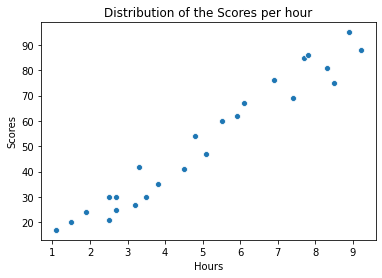

In [13]:
sns.scatterplot(x='Hours',y='Scores',data=Student_per_hour_train)
plt.title('Distribution of the Scores per hour')

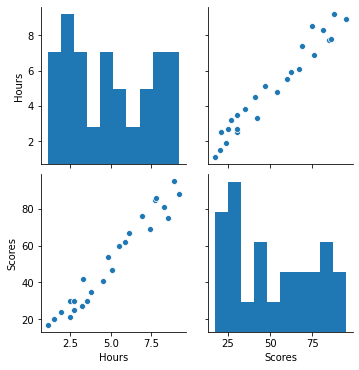

In [14]:
sns.pairplot(data=Student_per_hour_train)

Text(0.5, 1.0, 'Linear plot')

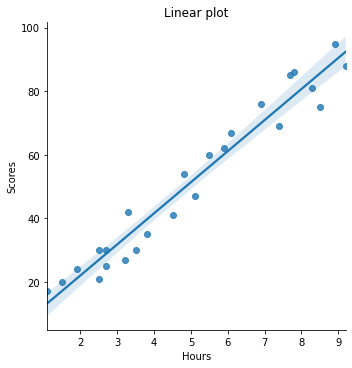

In [15]:
sns.lmplot(x='Hours',y='Scores',data=Student_per_hour_train)
plt.title('Linear plot')

Step 5: Preparing for the Train and test split

In [16]:
X=Student_per_hour_train[['Hours']]
y=Student_per_hour_train['Scores']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Step 6: Applying Model to the data.

As we can see, The data having two features containing the continuous data. So, we should go with the linear regression model as we have only one feature as input and target variable.So, we train the model with hours and scores as independent and dependent features respectively.

In [18]:
Lin_Reg = LinearRegression()

In [19]:
Lin_Reg.fit(X_train,y_train)

LinearRegression()

As we know that the Linear regression works on the Linear equation Y = mx + c, 

where, y = Dependent variable,
       x = Independent variable,
       m = Coefficient of the equation,
       c = Intercept of the equation

In [20]:
print(f'Linear Regression Coeff m : {Lin_Reg.coef_}')
print(f'Linear Regression Intercept c : {Lin_Reg.intercept_}')

Linear Regression Coeff m : [9.91065648]
Linear Regression Intercept c : 2.018160041434683


Step 7: Prediction of the test data

In [21]:
Prediction = Lin_Reg.predict(X_test)

In [22]:
Resulted_Data = pd.DataFrame({'Actual point':y_test,'Predict point':Prediction})

In [23]:
Resulted_Data

,Actual point,Predict point
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Step 8: Score and Accuracy of the Model

In [24]:
Lin_Reg.score(X_train,y_train)*100

95.15510725211553

In [25]:
Lin_Reg.score(X_test,Prediction)*100

100.0

In [26]:
n = len(X_test)
k = X_test.shape[1]
MSE = mean_squared_error(y_test, Prediction)
print(f'The Mean Squared Error MSE is : ',MSE)
MAE = mean_absolute_error(y_test, Prediction)
print(f'The Mean Absolute Error MAE is : ',MAE)
r2 = r2_score(y_test, Prediction)
print('The R2 Score is : {}'.format(r2))
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print('The Adj_R2 Score is : {}'.format(adj_r2))

The Mean Squared Error MSE is :  21.5987693072174
The Mean Absolute Error MAE is :  4.183859899002975
The R2 Score is : 0.9454906892105356
The Adj_R2 Score is : 0.9273209189473808


Visualizing the predicted result of the train data

Text(0.5, 1.0, 'Hours vs Scores(Train Data)')

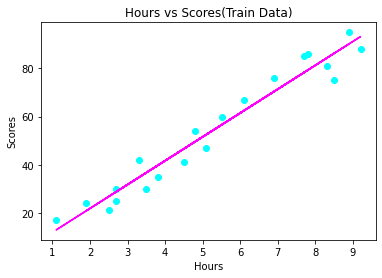

In [27]:
plt.scatter(X_train,y_train,color='cyan')
plt.plot(X_train,Lin_Reg.predict(X_train),color='magenta')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores(Train Data)')

Visualizing the predicted result of the test data

Text(0.5, 1.0, 'Hours vs Scores(Test Data)')

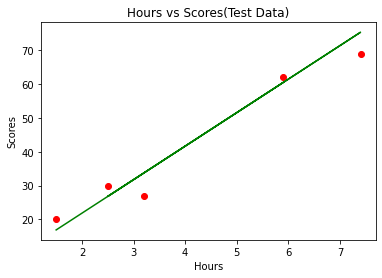

In [28]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,Prediction,color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores(Test Data)')

Checking the residuals from the data 

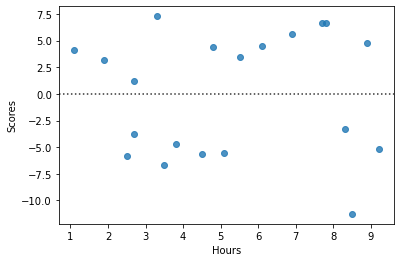

In [29]:
sns.residplot(X_train,y_train)

Checking the output with the required input as per the task assignment 

In [30]:
My_Study_Hour = 9.25
Lin_Reg.predict(np.array(My_Study_Hour).reshape(1,-1))

array([93.69173249])

In [31]:
Lin_Reg.predict([[9.5]])

array([96.16939661])